In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
sns.set(font_scale=1.2)

In [3]:
# Set seeds for reproducibility
random.seed(1234)
np.random.seed(1234)

In [4]:
# Load the data into dataframe
df = pd.read_csv('exploration-example.dat', sep=' ')

---
## Exploratory analysis

In [5]:
# Basic info on the dataframe's content
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 1 to 697
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      697 non-null    float64
 1   V2      697 non-null    float64
 2   V3      697 non-null    float64
 3   V4      697 non-null    float64
 4   V5      697 non-null    float64
 5   V6      697 non-null    float64
 6   V7      697 non-null    float64
 7   V8      697 non-null    float64
 8   V9      697 non-null    float64
 9   class   697 non-null    object 
dtypes: float64(9), object(1)
memory usage: 59.9+ KB


In [6]:
# Head and tail of data
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
1,-9.120882,17.930136,36.855584,7.649556,0.308385,-8.231486,-22.373005,-7.962422,7.738587,B
2,-13.490951,7.068722,43.260414,-19.006831,41.114269,5.661002,22.326953,-19.055678,22.672412,A
3,-9.673474,5.116914,21.302718,-33.829802,50.419601,1.363327,29.306072,-9.437409,28.109205,A
4,-18.881197,7.630898,51.928250,-25.190469,39.293878,26.739524,20.597481,-26.406426,14.893581,A
5,-13.285229,5.012493,42.144388,-36.682669,46.934069,16.033884,24.868398,-17.954822,20.578448,A
...,...,...,...,...,...,...,...,...,...,...
693,-13.822612,1.799070,55.212570,-16.247111,38.883557,12.199530,20.391249,-29.750593,21.392258,A
694,9.894664,-0.809947,6.245094,10.405654,-0.928394,-9.651001,12.972446,4.165240,4.554369,C
695,-15.891046,24.675692,19.620886,-18.112892,4.414313,-1.767463,-31.379709,-5.968082,7.910043,B
696,-9.063204,9.875179,46.287195,-17.363141,43.089452,10.411415,23.453484,-24.338696,23.037102,A


In [7]:
# List of unique classes
classes = list(sorted(df['class'].unique()))
print(classes)

['A', 'B', 'C']


In [8]:
# Basic descriptive statistics for all of the data
df.describe().round(decimals=2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00
mean,-4.81,8.96,24.86,-9.62,18.09,2.90,6.14,-7.20,11.60
std,8.94,7.22,16.23,15.73,22.38,11.83,18.27,12.00,11.37
min,-25.97,-4.25,-12.35,-45.38,-10.19,-33.69,-32.47,-41.78,-14.83
25%,-11.60,3.86,11.84,-23.94,-0.88,-5.29,-5.08,-16.44,1.29
50%,-4.53,7.06,23.71,-5.28,4.60,3.59,4.92,-6.85,13.95
75%,1.92,11.17,38.47,3.25,44.22,11.35,23.38,2.49,21.17
max,19.76,30.00,71.49,22.29,54.80,38.89,40.52,19.49,37.81


In [9]:
# Basic descriptive statistics for class A
df_A = df[df['class'] == 'A']
df_A.describe().round(decimals=2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00,276.00
mean,-12.63,6.77,40.84,-26.71,45.22,10.91,25.21,-18.68,21.19
std,5.70,3.30,8.58,7.27,3.41,8.64,4.63,6.79,5.64
min,-25.97,-2.55,13.93,-45.38,36.54,-14.40,12.96,-41.78,1.93
25%,-16.49,4.80,35.17,-31.81,42.94,5.79,22.36,-22.43,17.48
50%,-12.72,7.01,40.54,-26.44,45.36,11.29,24.71,-18.79,21.38
75%,-8.62,9.10,46.11,-21.94,47.54,16.83,28.43,-13.35,24.98
max,2.33,15.36,71.49,0.79,54.80,38.89,40.52,-3.83,37.81


In [10]:
# Basic descriptive statistics for class B
df_B = df[df['class'] == 'B']
df_B.describe().round(decimals=2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,153.00,153.00,153.00,153.00,153.00,153.00,153.00,153.00,153.00
mean,-4.77,20.85,21.92,-1.64,4.21,-10.37,-20.76,-5.36,15.60
std,5.73,3.25,9.41,7.62,3.61,8.92,5.24,7.09,6.09
min,-16.47,12.45,1.10,-19.16,-5.71,-33.69,-32.47,-28.26,-2.26
25%,-8.59,18.67,15.10,-7.24,1.95,-15.73,-24.05,-9.59,11.97
50%,-5.10,21.61,21.49,-1.57,4.24,-9.94,-21.16,-5.02,15.28
75%,-0.53,23.04,28.32,3.61,6.41,-3.92,-17.69,-0.89,19.51
max,9.17,30.00,45.91,18.46,14.61,9.25,-6.87,9.74,33.25


In [11]:
# Basic descriptive statistics for class C
df_C = df[df['class'] == 'C']
df_C.describe().round(decimals=2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,3.21,4.42,10.08,3.42,-1.92,2.21,1.86,3.57,-0.56
std,5.30,3.47,8.49,6.96,3.49,8.66,4.85,6.69,5.48
min,-9.80,-4.25,-12.35,-15.29,-10.19,-17.46,-10.01,-16.79,-14.83
25%,-0.39,1.74,4.17,-1.31,-4.40,-3.37,-1.44,-1.22,-4.10
50%,3.11,4.36,10.04,3.10,-1.89,1.56,1.93,3.45,-0.77
75%,6.74,6.72,16.31,8.48,0.73,8.38,5.32,7.99,3.04
max,19.76,17.66,35.02,22.29,7.08,24.16,15.41,19.49,14.94


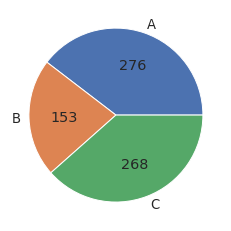

In [12]:
# Distribution of classes
counts = [len(df_A), len(df_B), len(df_C)]
colors = sns.color_palette()[:len(classes)]

plt.figure()
plt.pie(
    counts, labels=classes, colors=colors,
    autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100))
plt.show()

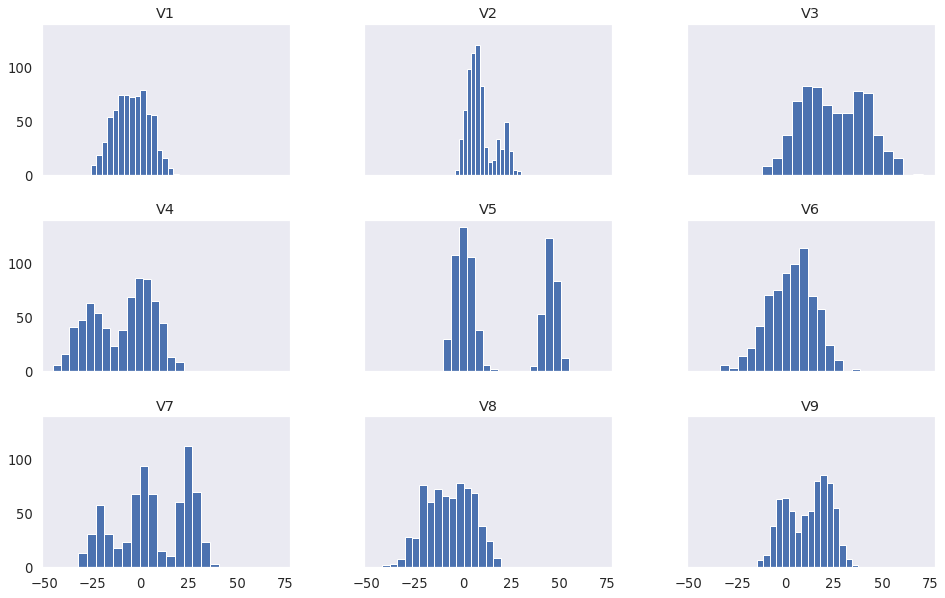

In [13]:
# Histograms for all of the data
df.hist(
    figsize=(16, 10), bins=16,
    sharex=True, sharey=True, grid=False)
plt.show()

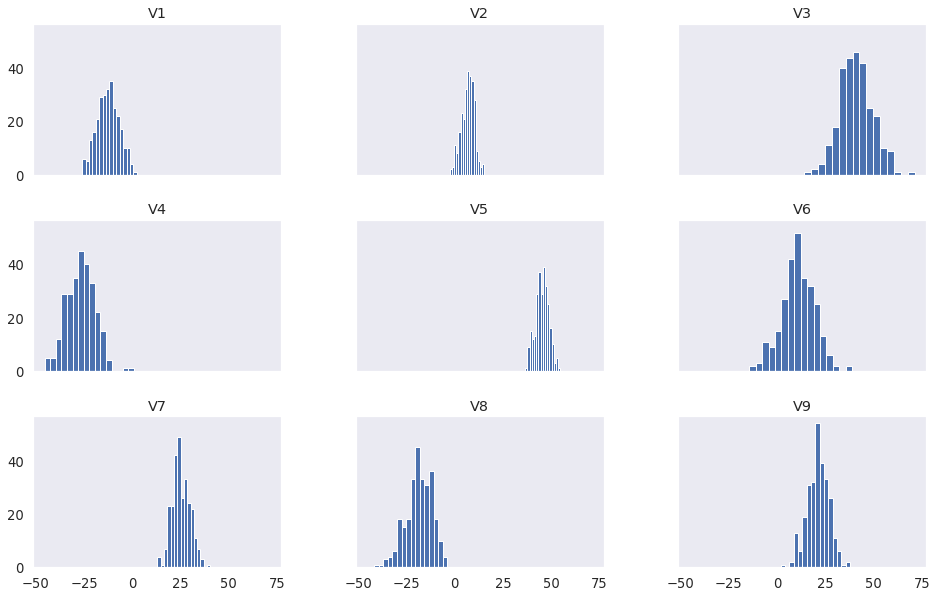

In [14]:
# Histograms for class A
df_A.hist(
    figsize=(16, 10), bins=16,
    sharex=True, sharey=True, grid=False)
plt.show()

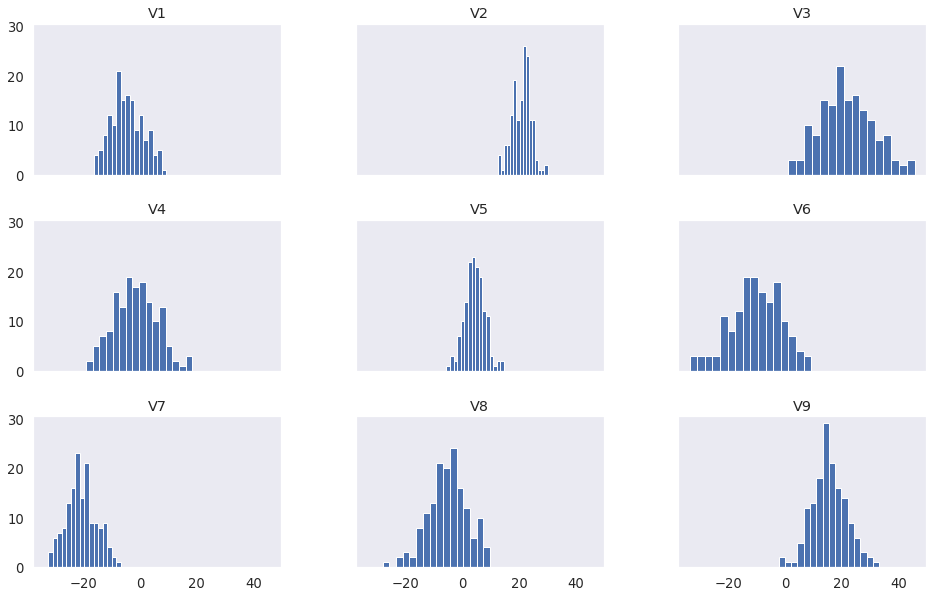

In [15]:
# Histograms for class B
df_B.hist(
    figsize=(16, 10), bins=16,
    sharex=True, sharey=True, grid=False)
plt.show()

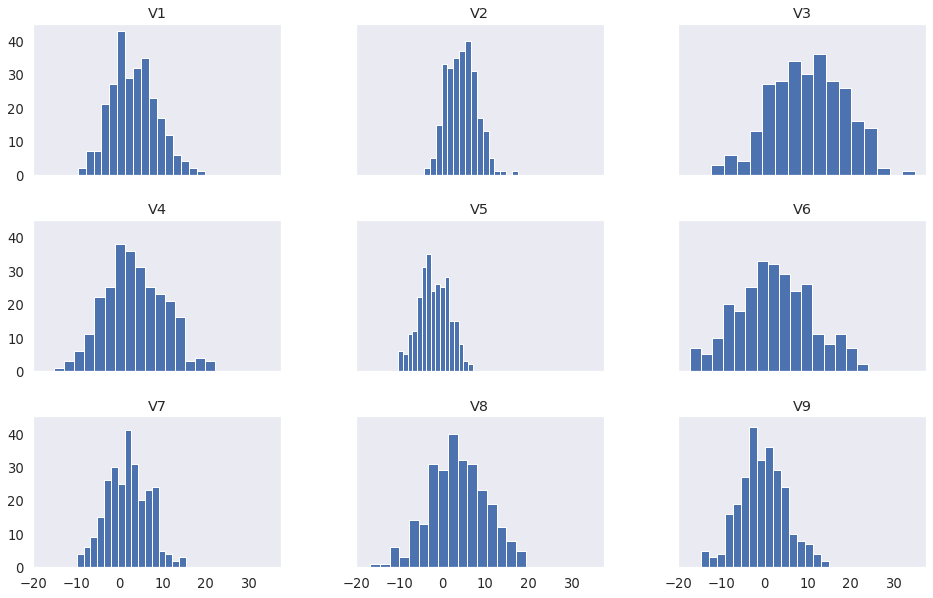

In [16]:
# Histograms for class C
df_C.hist(
    figsize=(16, 10), bins=16,
    sharex=True, sharey=True, grid=False)
plt.show()

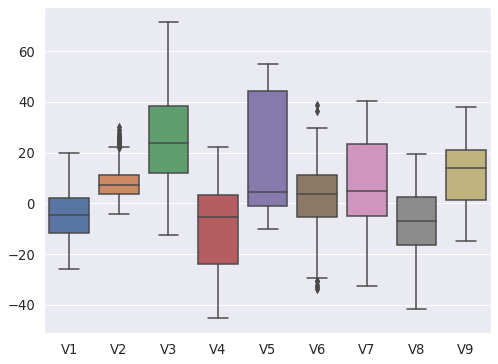

In [17]:
# Boxplot for all of the data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.show()

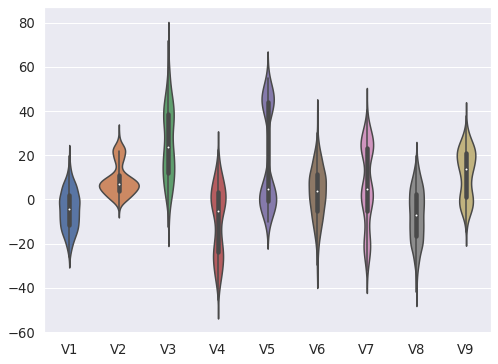

In [18]:
# Violin plot for all of the data
plt.figure(figsize=(8, 6))
sns.violinplot(data=df)
plt.show()

<Figure size 1152x1152 with 0 Axes>

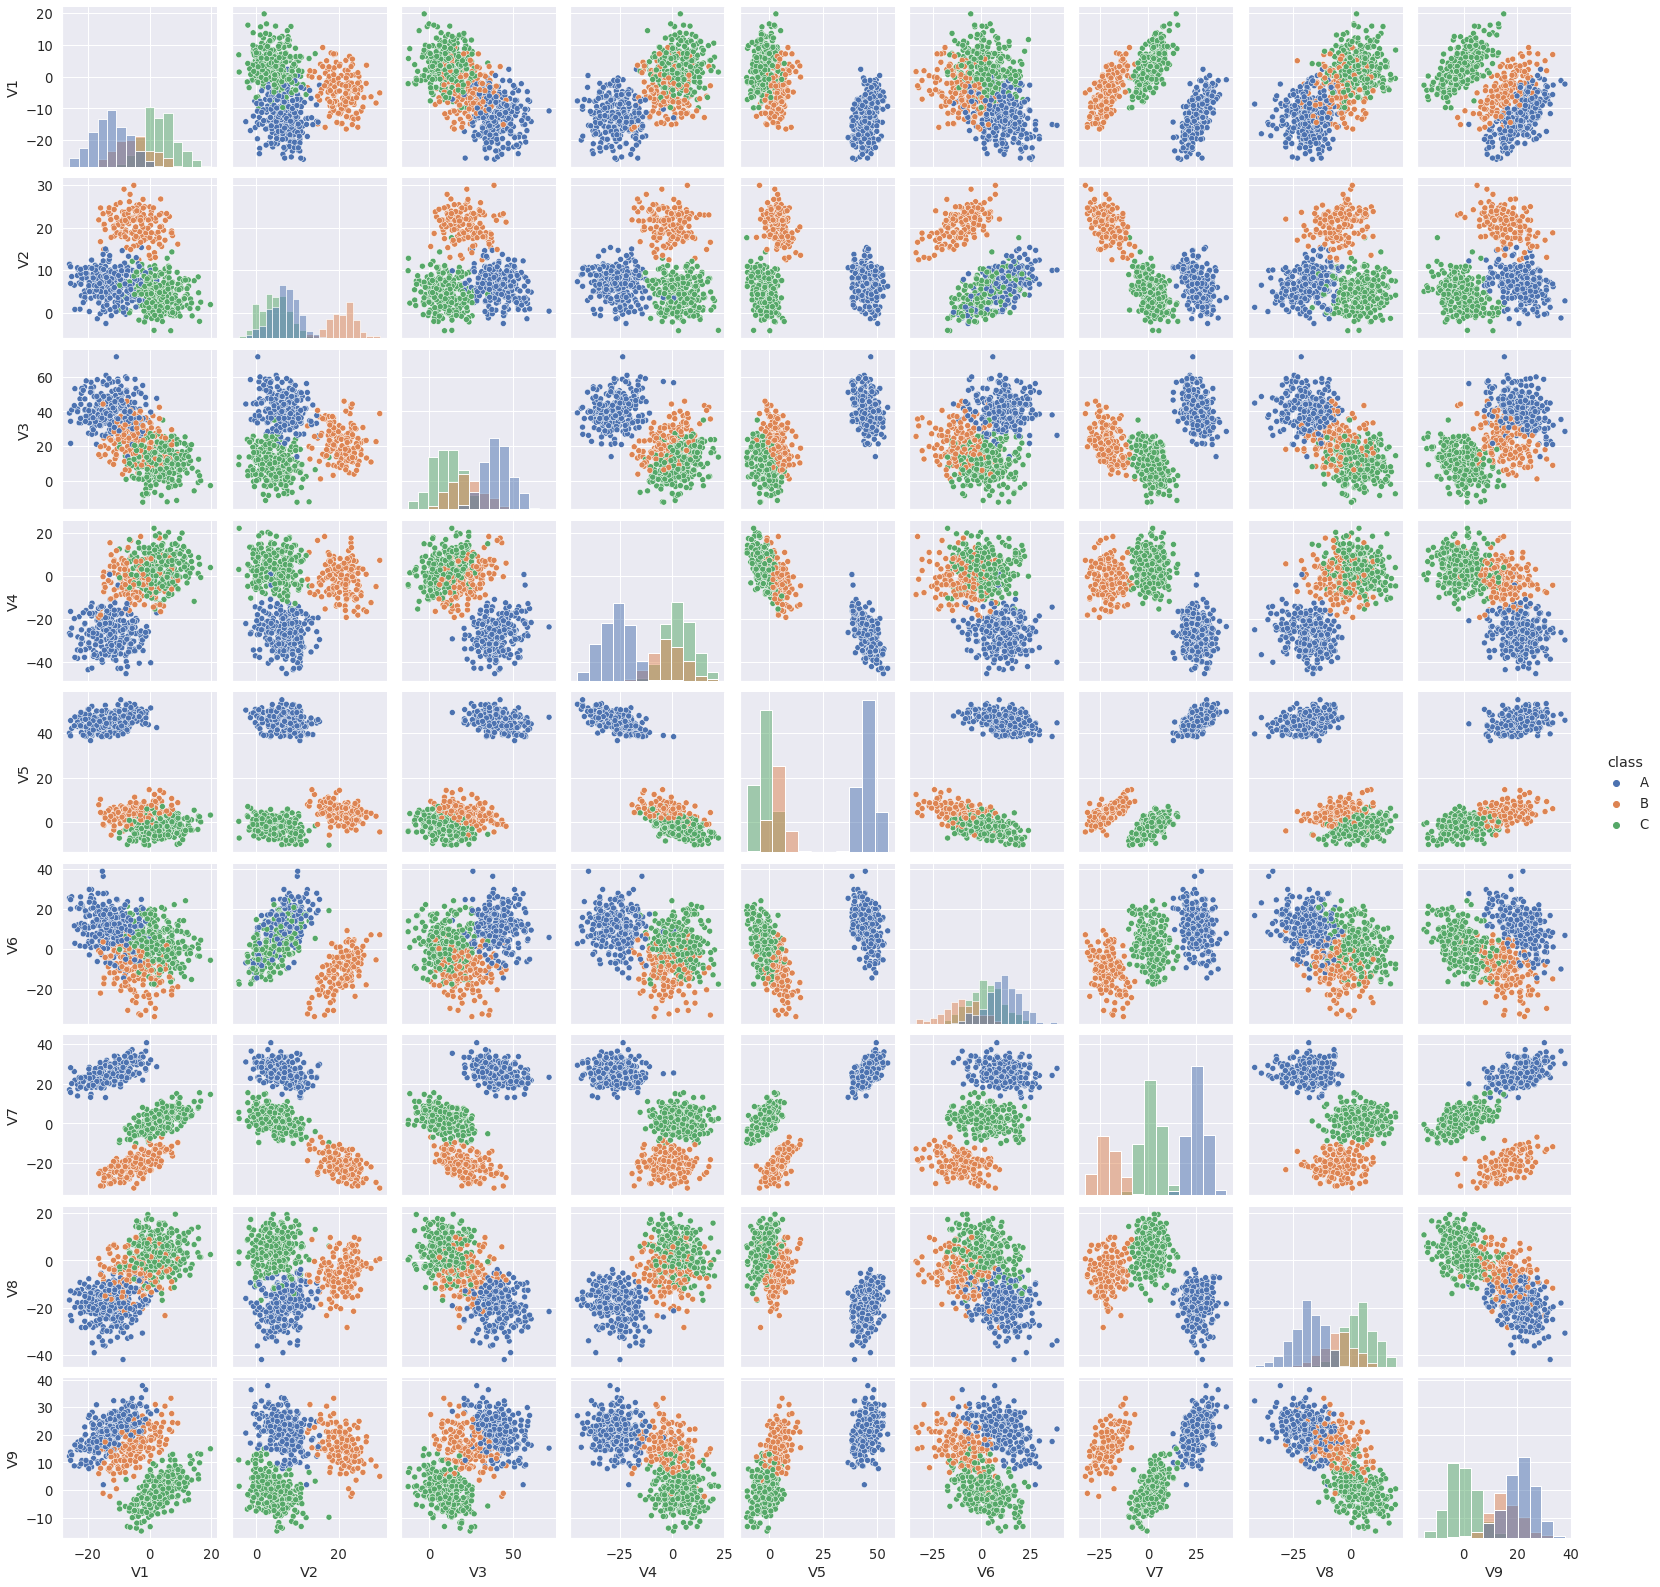

In [19]:
# Matrix of scatter plots and histograms
plt.figure(figsize=(16, 16))
sns.pairplot(df, hue='class', hue_order=classes, diag_kind='hist')
plt.show()

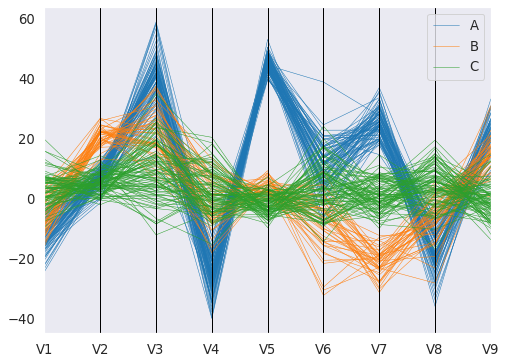

In [20]:
# Parallel coordinates plot for sample of the data
plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(
    df.sample(frac=0.3).sort_values('class'), class_column='class',
    color=['#1f77b4', '#ff7f0e', '#2ca02c'], lw=0.5)
plt.show()

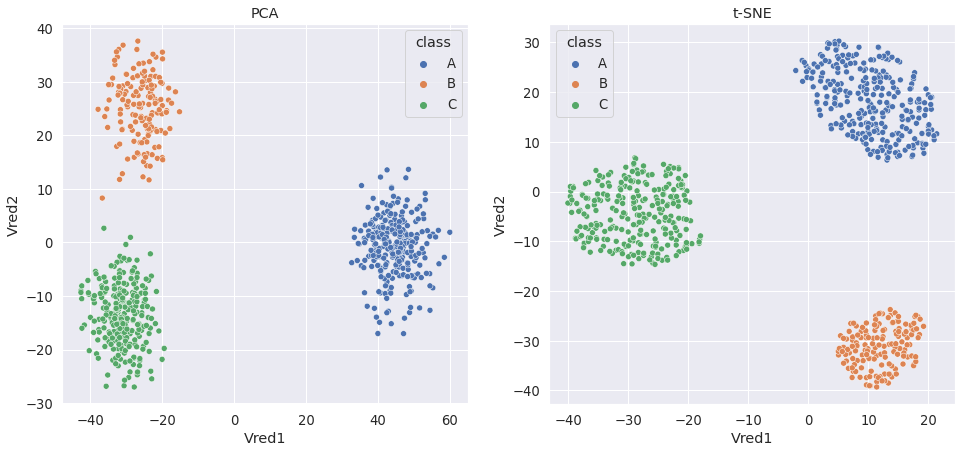

In [21]:
# Scatter plot of dimension reduced data (PCA and t-SNE)
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
df_red = pd.DataFrame(
    data=PCA(n_components=2).fit_transform(df.iloc[:, :-1]),
    index=df.index, columns=['Vred1', 'Vred2'])
df_red['class'] = df['class']
sns.scatterplot(
    data=df_red, x='Vred1', y='Vred2', hue='class',
    hue_order=classes)
plt.title('PCA')

plt.subplot(1, 2, 2)
df_red = pd.DataFrame(
    data=TSNE(
        n_components=2, learning_rate='auto', init='random'
    ).fit_transform(df.iloc[:, :-1]),
    index=df.index, columns=['Vred1', 'Vred2'])
df_red['class'] = df['class']
sns.scatterplot(
    data=df_red, x='Vred1', y='Vred2', hue='class',
    hue_order=classes)
plt.title('t-SNE')

plt.show()

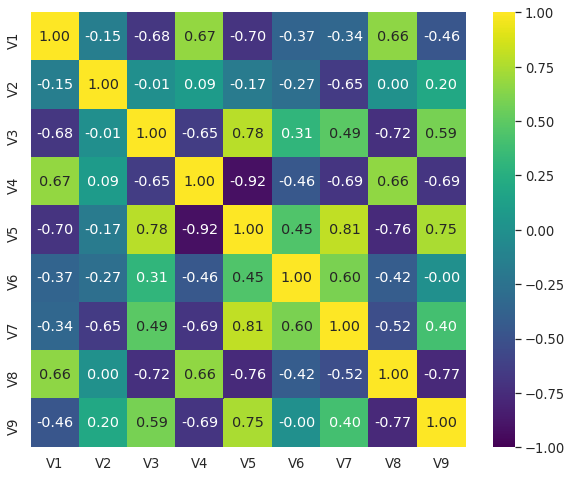

In [22]:
# Heatmap of correlation between attributes
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(), vmin=-1, vmax=1,
    annot=True, square=True, cmap='viridis', fmt='.2f')
plt.show()

---
## Classification

In [23]:
def train_and_eval_model(model, n_attributes, train_df, test_df):
    # Train and evaluate the model
    model.fit(train_df.iloc[:, :n_attributes], train_df['class'])
    print(
        'Train accuracy:',
        model.score(train_df.iloc[:, :n_attributes], train_df['class']))
    print(
        'Test accuracy:',
        model.score(test_df.iloc[:, :n_attributes], test_df['class']))

    train_df = train_df.assign(
        class_pred=model.predict(train_df.iloc[:, :n_attributes]))
    test_df = test_df.assign(
        class_pred=model.predict(test_df.iloc[:, :n_attributes]))

    print(
        'Train f1_score:',
        f1_score(
            train_df['class'], train_df['class_pred'],
            average='micro'))
    print(
        'Test f1_score:',
        f1_score(
            test_df['class'], test_df['class_pred'],
            average='micro'))
    
    # Confusion matrix for training data
    ConfusionMatrixDisplay.from_predictions(
        train_df['class'], train_df['class_pred'], colorbar=False)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.grid(False)
    plt.title('Training data')
    plt.show()
    
    # Confusion matrix for test data
    ConfusionMatrixDisplay.from_predictions(
        test_df['class'], test_df['class_pred'], colorbar=False)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.grid(False)
    plt.title('Test data')
    plt.show()

In [24]:
def plot_decision_boundary(model, train_df, test_df):
    x_min = min(train_df.iloc[:, 0].min(), test_df.iloc[:, 0].min())
    x_max = max(train_df.iloc[:, 0].max(), test_df.iloc[:, 0].max())
    y_min = min(train_df.iloc[:, 1].min(), test_df.iloc[:, 1].min())
    y_max = max(train_df.iloc[:, 1].max(), test_df.iloc[:, 1].max())

    dx = x_max - x_min
    dy = y_max - y_min

    x_min = x_min - 0.1 * dx
    x_max = x_max + 0.1 * dx
    y_min = y_min - 0.1 * dy
    y_max = y_max + 0.1 * dy       
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, (x_max-x_min)/150),
        np.arange(y_min, y_max, (y_max-y_min)/150))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.DataFrame(Z).iloc[:, 0].astype('category').cat.codes.to_numpy()
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(sns.color_palette()[:len(classes)])

    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, levels=4, alpha=0.2, cmap=cmap)

    plt.scatter(
        train_df.iloc[:, 0], train_df.iloc[:, 1],
        c=train_df['class'].astype('category').cat.codes,
        marker='.', cmap=cmap)
    plt.scatter(
        test_df.iloc[:, 0], test_df.iloc[:, 1],
        c=test_df['class'].astype('category').cat.codes,
        marker='x', cmap=cmap)

    plt.title('Decision boundary')
    plt.xlabel('V5')
    plt.ylabel('V7')
    plt.show()

---

In [25]:
# Split data into train and test sets
train_df, test_df = train_test_split(df, random_state=1234)

In [26]:
# Head and tail of training data
train_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
473,-6.976288,5.968884,38.577307,-27.920070,47.074794,3.908802,28.992150,-13.144306,24.979005,A
534,15.918275,4.682688,12.438489,8.686582,2.796214,0.293352,8.197191,9.126558,4.025976,C
40,-10.246265,21.898623,26.370672,-5.209544,6.012458,-10.635776,-22.946986,1.550290,8.413090,B
290,6.760847,3.616931,14.970280,12.308799,-4.844382,1.004875,2.331509,3.630308,-2.069810,C
242,-6.216707,6.446053,31.157120,-25.914447,45.708807,11.612523,31.156086,-12.909879,25.185328,A
...,...,...,...,...,...,...,...,...,...,...
665,-2.591664,4.369849,20.503051,3.283797,-2.803975,4.546611,-4.433063,-1.534204,-2.777811,C
373,-19.534721,0.268848,33.387339,-27.238286,48.202768,-2.881571,28.163740,-20.736325,27.100782,A
205,-20.311288,9.206479,34.164762,-26.772621,40.682772,18.230428,21.862014,-21.527695,17.044092,A
54,-14.279479,10.789593,46.548398,-35.651116,39.915551,20.496397,12.959768,-17.970261,20.389896,A


In [27]:
# Head and tail of test data
test_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
340,3.864191,20.337721,7.681348,-3.852703,4.776950,-3.521926,-12.332704,-12.045205,22.785514,B
550,-12.337254,6.864724,43.539372,-28.536278,46.660947,13.425586,26.360818,-28.185891,21.978755,A
256,-2.835553,7.650485,23.973609,-27.563901,48.617048,2.354259,33.175867,-15.870089,30.749165,A
84,-0.977868,3.637712,-1.989964,-4.460888,0.675167,-7.157023,0.647761,17.280819,-2.416840,C
674,-14.394623,19.582040,15.033412,-5.183983,1.947509,-4.156223,-23.030793,-14.980749,17.401022,B
...,...,...,...,...,...,...,...,...,...,...
535,0.788214,2.320261,6.047408,4.478090,-4.087929,1.250631,1.238718,2.026503,4.872894,C
623,-9.695820,6.435046,19.325566,-0.726972,-4.615020,-0.156878,-8.383726,-2.711818,-6.832496,C
182,6.178392,5.709070,-0.406137,-9.162881,2.935664,3.001750,6.858699,5.239217,2.211403,C
569,-4.805825,7.899174,45.092546,-21.183324,46.318928,11.379941,30.935328,-19.600674,23.944246,A


---

In [28]:
# Select two most important attributes
train_df_ = train_df[['V5', 'V7', 'class']]
test_df_ = test_df[['V5', 'V7', 'class']]

In [29]:
# Head and tail of training data
train_df_

,V5,V7,class
473,47.074794,28.992150,A
534,2.796214,8.197191,C
40,6.012458,-22.946986,B
290,-4.844382,2.331509,C
242,45.708807,31.156086,A
...,...,...,...
665,-2.803975,-4.433063,C
373,48.202768,28.163740,A
205,40.682772,21.862014,A
54,39.915551,12.959768,A


In [30]:
# Head and tail of test data
test_df_

,V5,V7,class
340,4.776950,-12.332704,B
550,46.660947,26.360818,A
256,48.617048,33.175867,A
84,0.675167,0.647761,C
674,1.947509,-23.030793,B
...,...,...,...
535,-4.087929,1.238718,C
623,-4.615020,-8.383726,C
182,2.935664,6.858699,C
569,46.318928,30.935328,A


### K-Nearest Neighbors (all attributes)

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


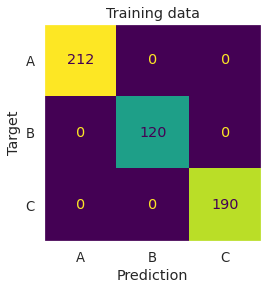

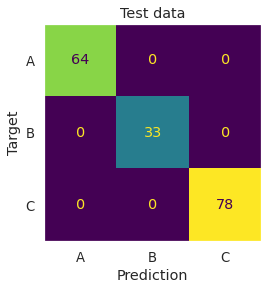

In [31]:
train_and_eval_model(
    model=KNeighborsClassifier(n_neighbors=5),
    n_attributes=9, train_df=train_df, test_df=test_df)

### K-Nearest Neighbors (selected attributes)

In [32]:
model = KNeighborsClassifier(n_neighbors=5)

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


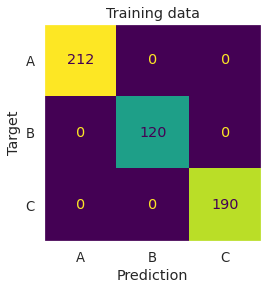

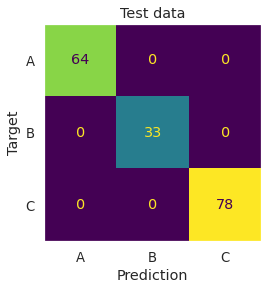

In [33]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


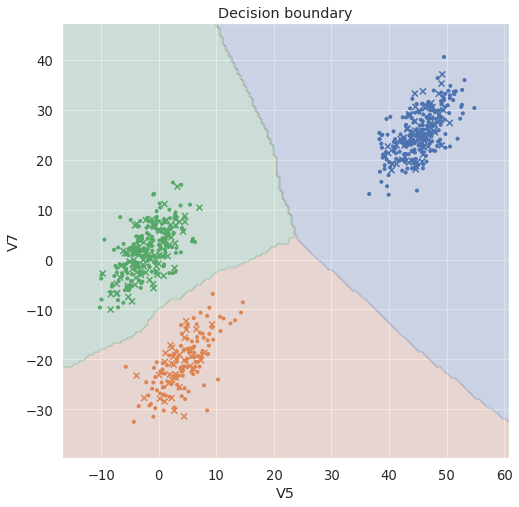

In [34]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

### Nearest Centroid (selected attributes)

In [35]:
model=NearestCentroid()

Train accuracy: 0.9980842911877394
Test accuracy: 1.0
Train f1_score: 0.9980842911877394
Test f1_score: 1.0


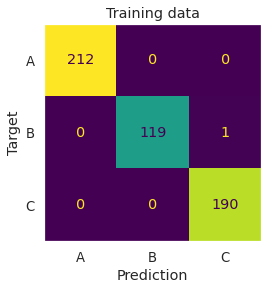

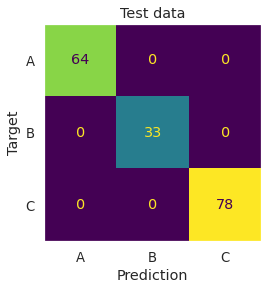

In [36]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


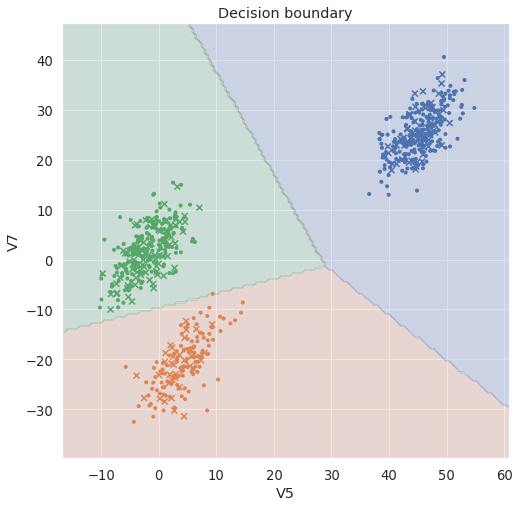

In [37]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

### Naive Bayes (selected attributes)

In [38]:
model = GaussianNB()

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


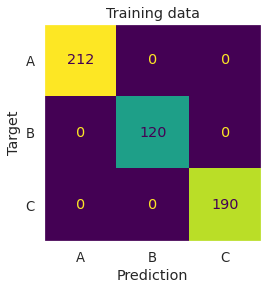

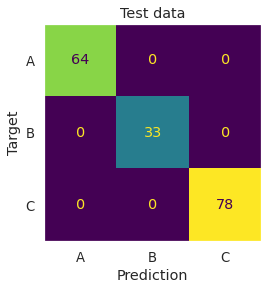

In [39]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


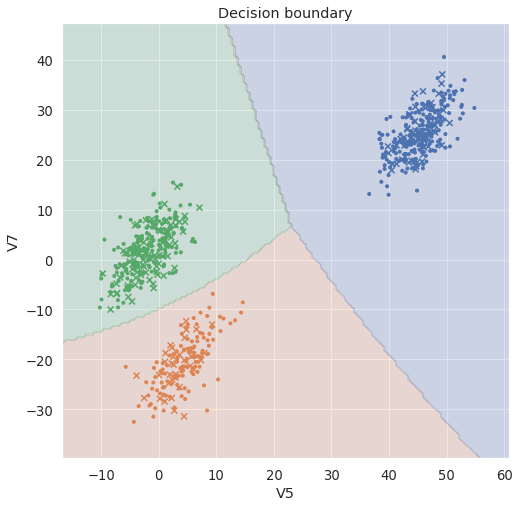

In [40]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

### Decision Tree (selected attributes)

In [41]:
model = DecisionTreeClassifier(criterion='entropy')

Train accuracy: 1.0
Test accuracy: 0.9942857142857143
Train f1_score: 1.0
Test f1_score: 0.9942857142857143


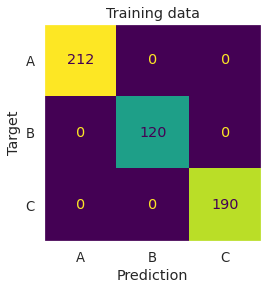

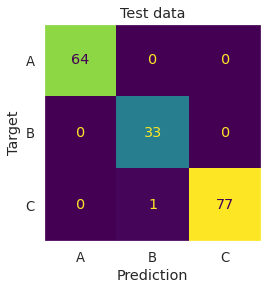

In [42]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


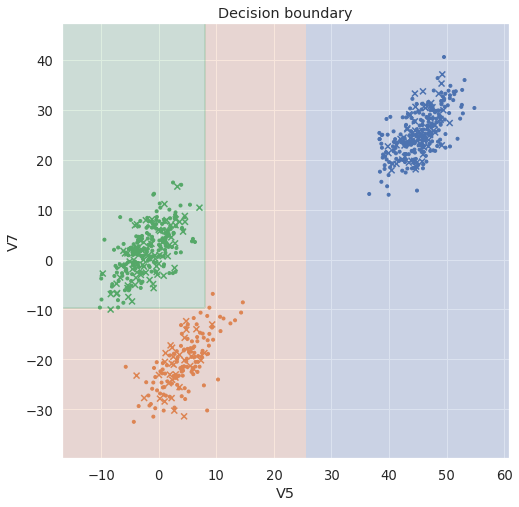

In [43]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

[Text(0.6, 0.875, 'X[0] <= 25.577\nentropy = 1.546\nsamples = 522\nvalue = [212, 120, 190]'),
 Text(0.4, 0.625, 'X[1] <= -9.62\nentropy = 0.963\nsamples = 310\nvalue = [0, 120, 190]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 118\nvalue = [0, 118, 0]'),
 Text(0.6, 0.375, 'X[0] <= 7.849\nentropy = 0.084\nsamples = 192\nvalue = [0, 2, 190]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 190\nvalue = [0, 0, 190]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 212\nvalue = [212, 0, 0]')]

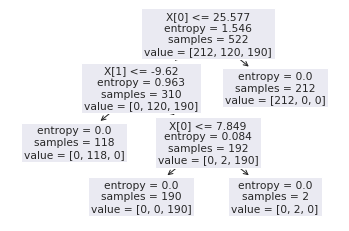

In [44]:
plot_tree(model)

### Random Forest (selected attributes)

In [45]:
model = RandomForestClassifier(n_estimators=50, max_depth=3)

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


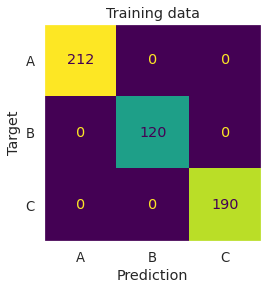

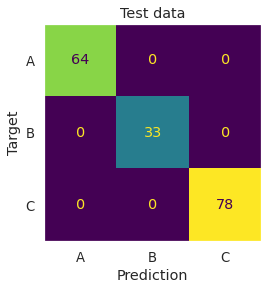

In [46]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


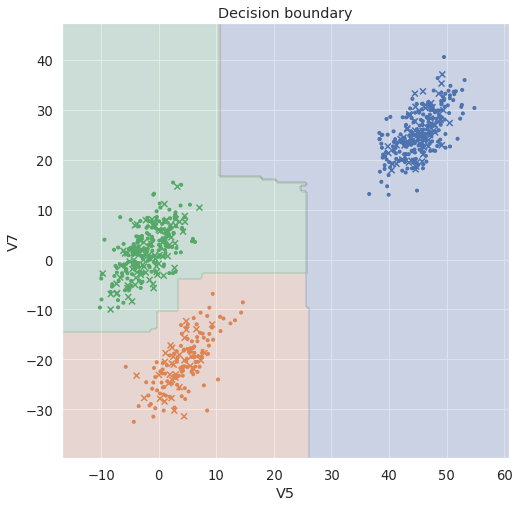

In [47]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

### Multilayer Perceptron (selected attributes)

In [48]:
model = MLPClassifier(hidden_layer_sizes=(3,), solver='lbfgs')

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


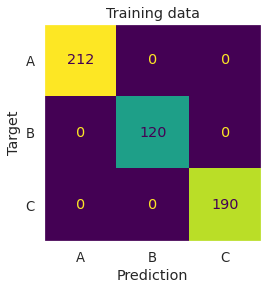

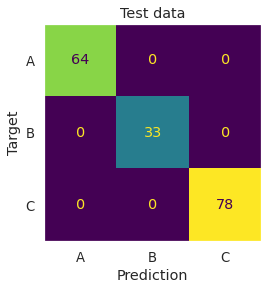

In [49]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


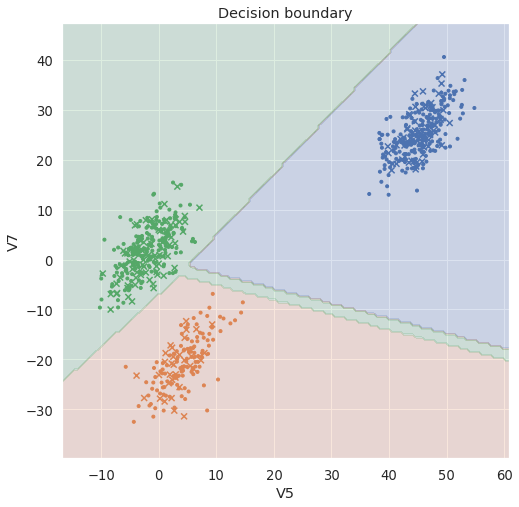

In [50]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

### Support Vector Machine (selected attributes)

In [51]:
model = SVC()

Train accuracy: 1.0
Test accuracy: 1.0
Train f1_score: 1.0
Test f1_score: 1.0


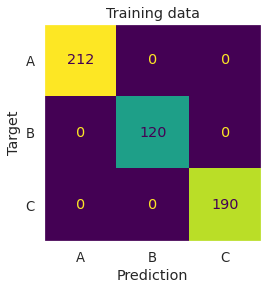

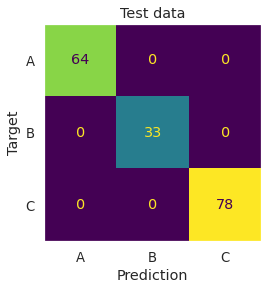

In [52]:
train_and_eval_model(
    model=model,
    n_attributes=2, train_df=train_df_, test_df=test_df_)

/home/czyzi0/.miniconda3/envs/ml-notebooks/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


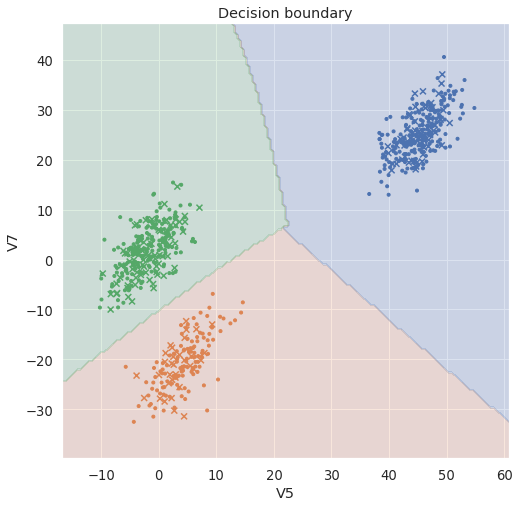

In [53]:
plot_decision_boundary(
    model=model, train_df=train_df_, test_df=test_df_)

---
## Clustering

### K-Means

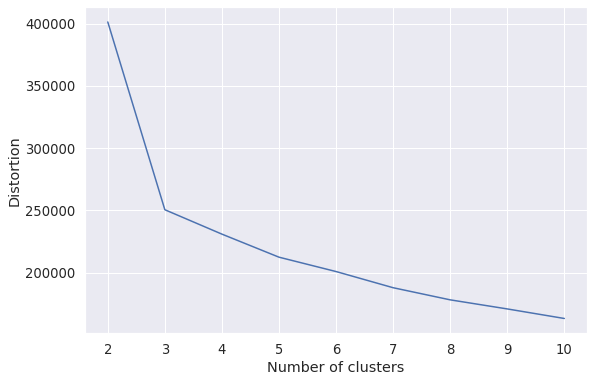

In [54]:
# Find optimal number of clusters
ks = range(2, 11)

distortions = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df.iloc[:, :9])
    distortions.append(model.inertia_)

plt.figure(figsize=(9, 6))
plt.plot(ks, distortions)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [55]:
# Cluster using KMeans
model = KMeans(n_clusters=3)
df = df.assign(cluster=model.fit_predict(df.iloc[:, :9]))

In [56]:
# Head and tail of all the data (with clusters)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,cluster
1,-9.120882,17.930136,36.855584,7.649556,0.308385,-8.231486,-22.373005,-7.962422,7.738587,B,2
2,-13.490951,7.068722,43.260414,-19.006831,41.114269,5.661002,22.326953,-19.055678,22.672412,A,1
3,-9.673474,5.116914,21.302718,-33.829802,50.419601,1.363327,29.306072,-9.437409,28.109205,A,1
4,-18.881197,7.630898,51.928250,-25.190469,39.293878,26.739524,20.597481,-26.406426,14.893581,A,1
5,-13.285229,5.012493,42.144388,-36.682669,46.934069,16.033884,24.868398,-17.954822,20.578448,A,1
...,...,...,...,...,...,...,...,...,...,...,...
693,-13.822612,1.799070,55.212570,-16.247111,38.883557,12.199530,20.391249,-29.750593,21.392258,A,1
694,9.894664,-0.809947,6.245094,10.405654,-0.928394,-9.651001,12.972446,4.165240,4.554369,C,0
695,-15.891046,24.675692,19.620886,-18.112892,4.414313,-1.767463,-31.379709,-5.968082,7.910043,B,2
696,-9.063204,9.875179,46.287195,-17.363141,43.089452,10.411415,23.453484,-24.338696,23.037102,A,1


In [57]:
# Calculate confusion matrix of clustering
conf = pd.crosstab(df['class'], df['cluster'])
print(conf)

cluster    0    1    2
class                 
A          0  276    0
B          0    0  153
C        268    0    0


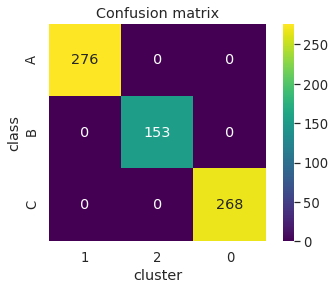

In [58]:
order = [1, 2, 0]
conf = conf[order]  # Rearrange columns
sns.heatmap(conf, annot=conf, square=True, cmap='viridis', fmt='.0f')
plt.title('Confusion matrix')
plt.show()

### Agglomerative

In [59]:
# Cluster using agglomerative
model = AgglomerativeClustering(n_clusters=3, linkage='single')
df = df.assign(cluster=model.fit_predict(df.iloc[:, :9]))

In [60]:
# Head and tail of all the data (with clusters)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,cluster
1,-9.120882,17.930136,36.855584,7.649556,0.308385,-8.231486,-22.373005,-7.962422,7.738587,B,0
2,-13.490951,7.068722,43.260414,-19.006831,41.114269,5.661002,22.326953,-19.055678,22.672412,A,1
3,-9.673474,5.116914,21.302718,-33.829802,50.419601,1.363327,29.306072,-9.437409,28.109205,A,1
4,-18.881197,7.630898,51.928250,-25.190469,39.293878,26.739524,20.597481,-26.406426,14.893581,A,1
5,-13.285229,5.012493,42.144388,-36.682669,46.934069,16.033884,24.868398,-17.954822,20.578448,A,1
...,...,...,...,...,...,...,...,...,...,...,...
693,-13.822612,1.799070,55.212570,-16.247111,38.883557,12.199530,20.391249,-29.750593,21.392258,A,1
694,9.894664,-0.809947,6.245094,10.405654,-0.928394,-9.651001,12.972446,4.165240,4.554369,C,2
695,-15.891046,24.675692,19.620886,-18.112892,4.414313,-1.767463,-31.379709,-5.968082,7.910043,B,0
696,-9.063204,9.875179,46.287195,-17.363141,43.089452,10.411415,23.453484,-24.338696,23.037102,A,1


In [61]:
# Calculate confusion matrix of clustering
conf = pd.crosstab(df['class'], df['cluster'])
print(conf)

cluster    0    1    2
class                 
A          0  276    0
B        153    0    0
C          0    0  268


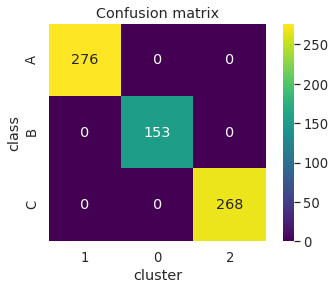

In [62]:
order = [1, 0, 2]
conf = conf[order]  # Rearrange columns
sns.heatmap(conf, annot=conf, square=True, cmap='viridis', fmt='.0f')
plt.title('Confusion matrix')
plt.show()